In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

### Matplotlib Example

plt.plot(listing of x coordinates, listing of y coordinates)


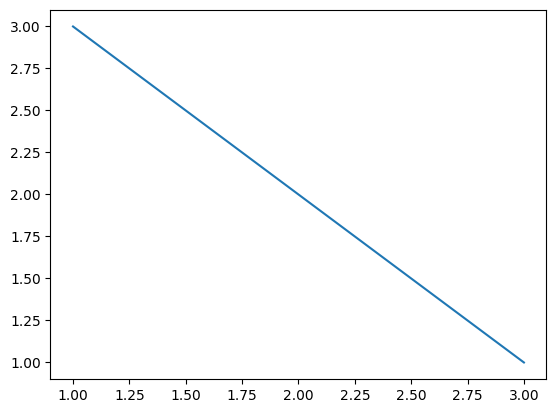

In [2]:
# plt.plot(listing of x coordinates, listing of y coordinates)
# plot -> continuous line, scatter -> points
plt.plot([1,2,3], [3,2,1])
plt.show()

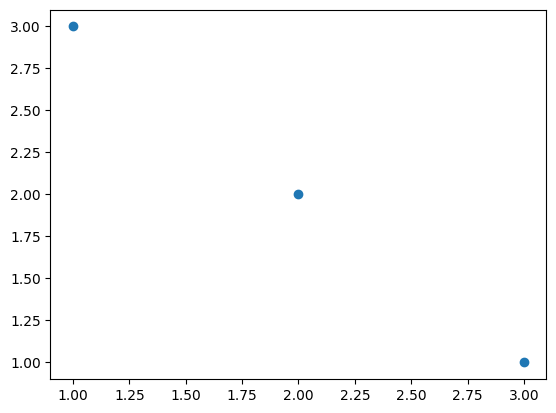

In [3]:
plt.scatter([1,2,3], [3,2,1])
plt.show()

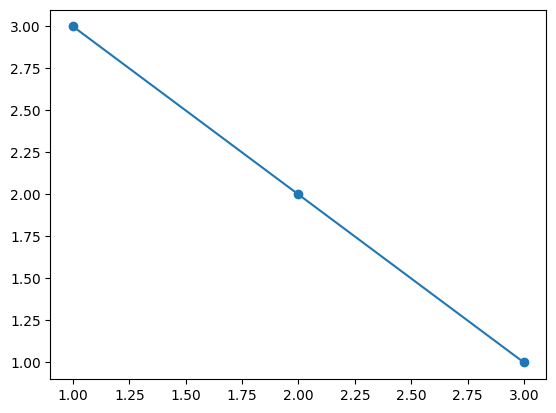

In [4]:
# together
plt.plot([1,2,3], [3,2,1])
plt.scatter([1,2,3], [3,2,1])
plt.show()

### Drawing a function

$-\left(\frac{2}{7}x^3 - \frac{9}{2}x^2 + 15x - 10\right)$

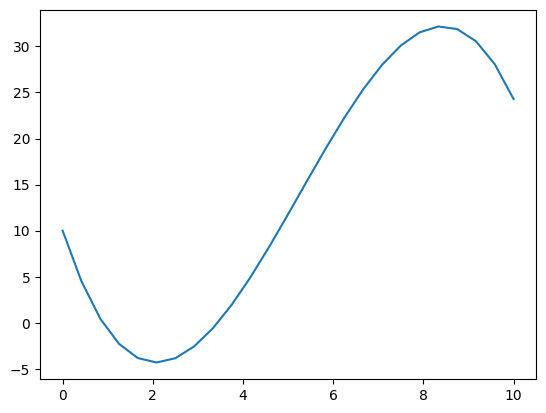

In [9]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)

"""
def foo(x):
  return -(2/7*x**3-9/2*x**2+15*x-10.)
"""

# x_line = np.linspace(0, 10, 100)
x_line = np.linspace(0, 10, 25)

# 100 data pts 0 to 10 (include end pt)

# Quiz: Draw the function foo using x_line

y_line = foo(x_line)
plt.plot(x_line, y_line)
plt.show()


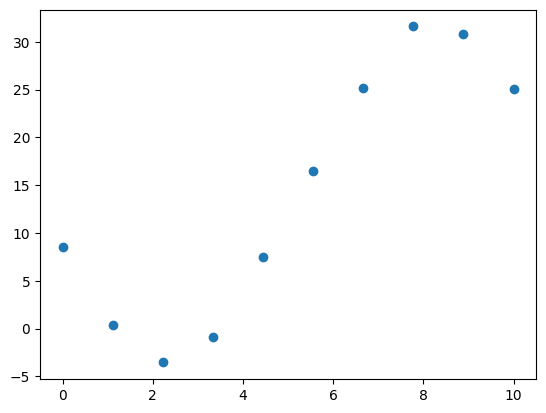

In [14]:
# Making 5 continuous points of foo in the domain [0, 10]
# with Gaussian noise where mu=0, sigma=0.1 and visualize.

sample_size = 10
x_sample = np.linspace(0, 10, sample_size)
np.random.seed(200)
y_sample = foo(x_sample) + np.random.normal(loc=0, scale=1, size=sample_size)

plt.scatter(x_sample, y_sample)
# plt.plot(x_sample, y_sample)
plt.show()

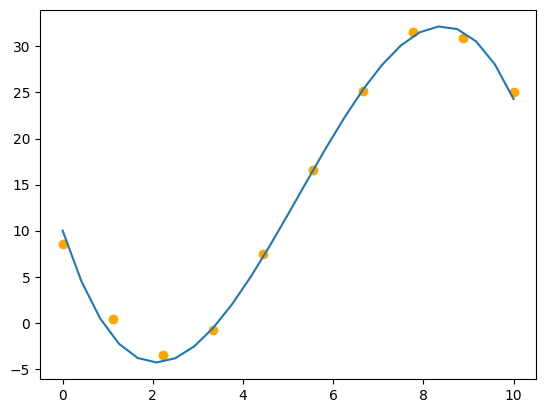

In [19]:
# put together?

plt.plot(x_line, y_line)
# plt.scatter(x_sample, y_sample)
plt.scatter(x_sample, y_sample, color = 'orange')

# not on the top of this // something is lower something is higher
plt.show()

# orange data pt -> linear regression

## Linear Regression

In the previous section, we first defined the target function,`foo`, and added Gaussian noise to the sampled data points. However, in real-world scenarios, the task is to infer the underlying data distribution function from noisy data points (training data) and predict the \( y \)-values for new data points. This time, we will work on the task of restoring the original function, `foo`, from the noisy samples generated earlier.









In [21]:
print(x_sample.shape)
print(y_sample.shape)

# 1 dimensional array w/ 10 data

(10,)
(10,)


In [25]:
from sklearn.linear_model import LinearRegression

# Why is there an error?
lr = LinearRegression()
# lr.fit(x_sample, y_sample)
lr.fit(x_sample.reshape(-1,1), y_sample)
# x_sample should be 2D array
# why x_sample should be 2D array <- 1D array is ambiguous

LinearRegression()

In [24]:
x_sample.reshape(-1,1).shape

(10, 1)

In [ ]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(x_sample.reshape(-1,1), y_sample)

In [30]:
# Now let's predict

# y_hat = lr.predict(x_sample)
# error since x_sample should be 2D array

y_hat = lr.predict(x_sample.reshape(-1,1))
y_hat
# predicted one

array([-2.9033185 ,  0.88166736,  4.66665322,  8.45163907, 12.23662493,
       16.02161079, 19.80659665, 23.59158251, 27.37656836, 31.16155422])

In [32]:
print(f"X: {x_sample}")
print(f"y: {y_sample}") # original one
print(f"y_hat: {y_hat}") # predicted one

X: [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
y: [ 8.54905175  0.4079157  -3.5346425  -0.82974887  7.50040411 16.53181615
 25.12256863 31.60208531 30.86400811 25.07772022]
y_hat: [-2.9033185   0.88166736  4.66665322  8.45163907 12.23662493 16.02161079
 19.80659665 23.59158251 27.37656836 31.16155422]


In [33]:
# Calculating Mean Square Error
mse = ((y_hat-y_sample)**2).sum() / x_sample.size
print(mse)

44.90817211080971


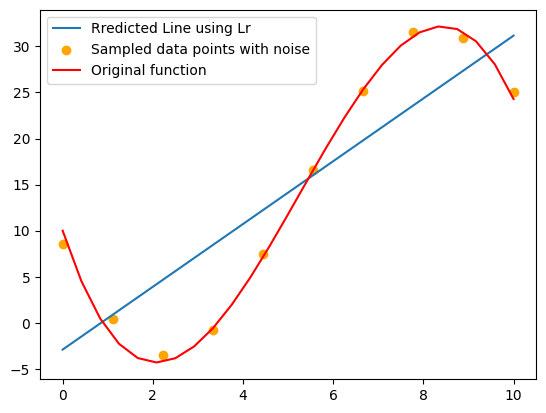

'\nfrom below code,\nI want to add legend\nfor plotting x_line, y_line, it is "original function"\nfor plotting x_sample, y_hat, it is "Sampled datapoints with noise"\nfor plot x_sample, y_hat it is predicted line lr\n'

In [42]:
plt.plot(x_sample, y_hat, label = "Rredicted Line using Lr") # linear regression
plt.scatter(x_sample, y_sample, color='orange', label = "Sampled data points with noise") # original data pt
plt.plot(x_line,y_line, color='red', label = "Original function") # our goal of regression
plt.legend()
plt.show()



"""
from below code,
I want to add legend
for plotting x_line, y_line, it is "original function"
for plotting x_sample, y_hat, it is "Sampled datapoints with noise"
for plot x_sample, y_hat it is predicted line lr
"""

In [ ]:
# # Adding Legend
# plt.plot(x_sample, y_hat, label='Predicted Function')  # Add label for the line
# plt.scatter(x_sample, y_sample, color='orange', label='Actual Data')  # Add label for the scatter points
# plt.legend()  # Display the legend
# plt.show()

### Iris Dataset

The Iris dataset is a well-known dataset in machine learning and statistics. It contains 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample includes four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters. These features are used to classify the species of the iris flowers.

In [ ]:
"""
4 features: sepal length, sepal width, petal length, and petal width // from the X

Y : Iris setosa, Iris versicolor, and Iris virginica

[
  [sepal length, sepal width, petal length, and petal width],
  [sepal length, sepal width, petal length, and petal width],
  [sepal length, sepal width, petal length, and petal width],
  [sepal length, sepal width, petal length, and petal width],
  [sepal length, sepal width, petal length, and petal width],
]
"""

In [45]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# if I use the false then dictionary

In [46]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [51]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [52]:
X_train[:,:2].shape

# to plot this we use only two features

(120, 2)

### Classifiers

In [73]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:,:2], y_train)
# logistic.fit(X_train, y_train)


from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='poly', degree=3)
# svc = SVC(C=1.0, kernel='linear', degree=3)

svc.fit(X_train[:,:2], y_train)
# svc.fit(X_train, y_train)


from sklearn.tree import DecisionTreeClassifier as DTC
tree = DTC(max_depth=2, random_state=1234)
tree.fit(X_train[:, :2], y_train)
# tree.fit(X_train, y_train)


# set up the hyper parameter
# from below what are the otheroptions(hyperparmater) for each classifier

DecisionTreeClassifier(max_depth=2, random_state=1234)

In [67]:
# Use the model's predict() to calculate the test accuracy.

y_svc = svc.predict(X_test[:, :2])
print(y_svc)
print((y_test == y_svc).mean())
# y_test original target -> 73% correct

[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0]
0.7333333333333333


In [74]:
# More simple way

print(svc.score(X_test[:, :2], y_test))
print(tree.score(X_test[:, :2], y_test))
print(logistic.score(X_test[:, :2], y_test))

# print(svc.score(X_test[:, :], y_test))
# print(tree.score(X_test[:, :], y_test))
# print(logistic.score(X_test[:, :], y_test))

0.7333333333333333
0.5666666666666667
0.7333333333333333


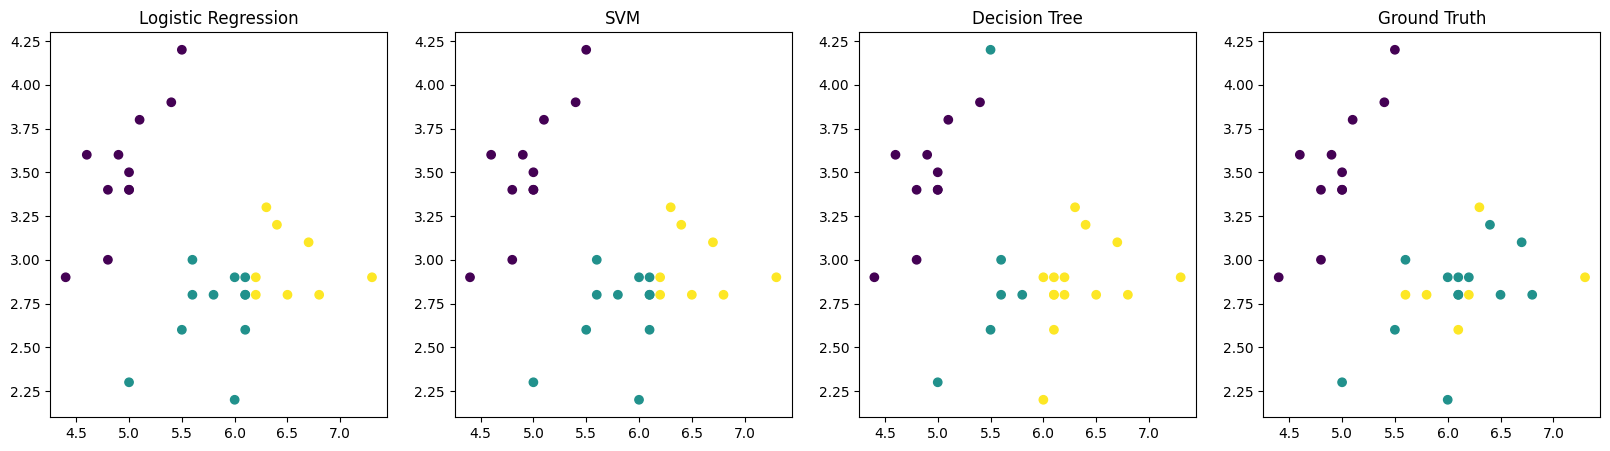

'\ndefine figure size\n\n1, 4 and first\n\n1, 4 and second\n\n1, 4 and third\n\n1, 4 and fourth\n'

In [79]:
y_logistic = logistic.predict(X_test[:, :2])
y_svc = svc.predict(X_test[:, :2])
y_tree = tree.predict(X_test[:, :2])

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic)
# first feature -> x / 2nd feature -> y

plt.subplot(142)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svc)

plt.subplot(143)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_tree)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

plt.show()

"""
define figure size

1, 4 and first

1, 4 and second

1, 4 and third

1, 4 and fourth
"""

# Adding Decision boundary Using AI504 Chatbot?

In [ ]:
"""
I want to add decision boundary
"""

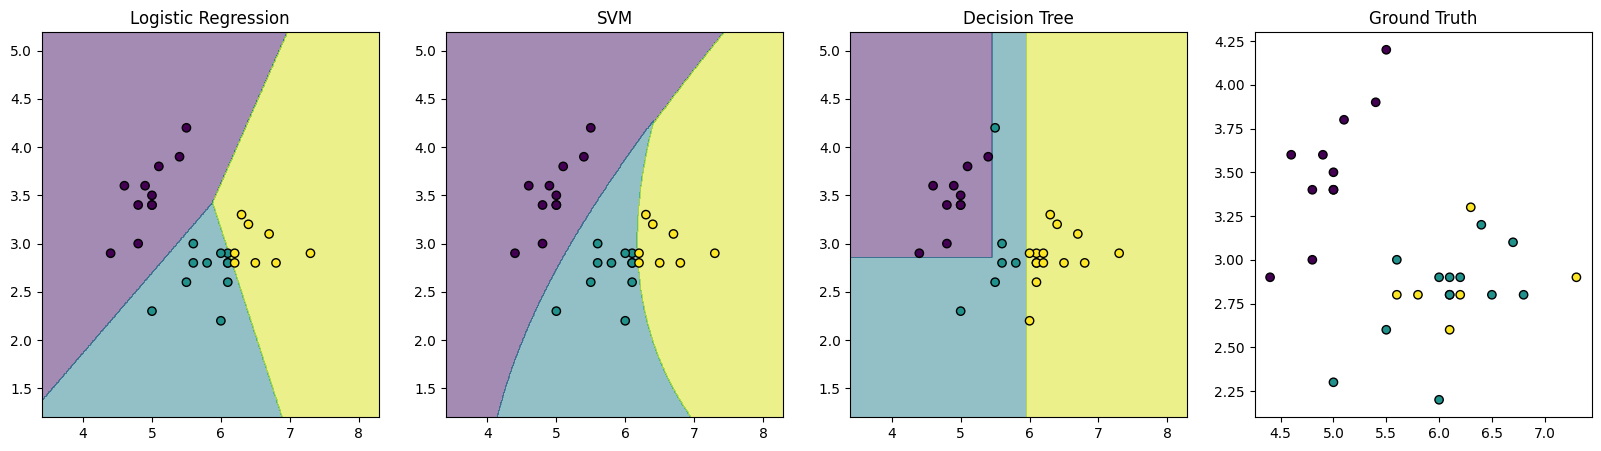

In [80]:
# Assuming X_test and y_test are defined, and logistic, svc, and tree are trained models

# Create a mesh grid
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

plt.figure(figsize=(20, 5))

# Logistic Regression
plt.subplot(141)
plt.title('Logistic Regression')
Z_logistic = logistic.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logistic = Z_logistic.reshape(xx.shape)
plt.contourf(xx, yy, Z_logistic, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic, edgecolors='k')

# SVM
plt.subplot(142)
plt.title('SVM')
Z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svc = Z_svc.reshape(xx.shape)
plt.contourf(xx, yy, Z_svc, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svc, edgecolors='k')

# Decision Tree
plt.subplot(143)
plt.title('Decision Tree')
Z_tree = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_tree = Z_tree.reshape(xx.shape)
plt.contourf(xx, yy, Z_tree, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_tree, edgecolors='k')

# Ground Truth
plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')

plt.show()